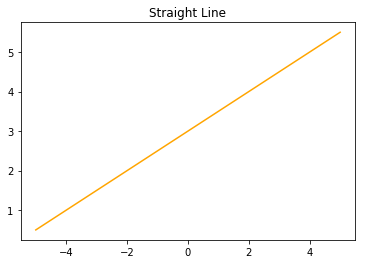

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#令x为-5到5之间，元素数为100的等差数列
x=np.linspace(-5,5,100)
#输入直线方程
y=0.5*x+3
plt.plot(x,y,c='orange')
#图题设为“straight line”
plt.title('Straight Line')
plt.show()

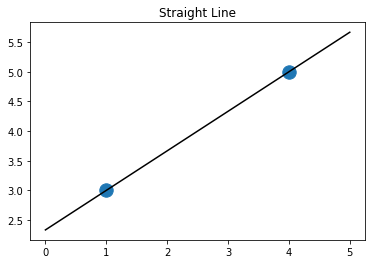

In [22]:
#导入线性回归模型
from sklearn.linear_model import LinearRegression
#输入两个点的横坐标
X=[[1],[4]]
y=[3,5]
#用线性模型拟合这两个点
lr=LinearRegression().fit(X,y)
#画出两个点和直线的图形
z=np.linspace(0,5,20)
plt.scatter(X,y,s=180)
plt.plot(z,lr.predict(z.reshape(-1,1)),c='k')
plt.title('Straight Line')
plt.show()

In [23]:
print('y={:.3f}'.format(lr.coef_[0]),'x','+{:.3f}'.format(lr.intercept_))

y=0.667 x +2.333


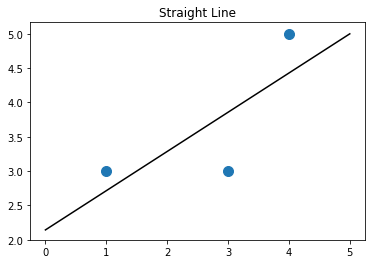

In [24]:
#输入3个点的横坐标
X=[[1],[4],[3]]
#输入3个点的纵坐标
y=[3,5,3]
#用线性模型拟合这3个点
lr=LinearRegression().fit(X,y)
#画出2个点和直线的图形
z=np.linspace(0,5,20)
plt.scatter(X,y,s=100)
plt.plot(z,lr.predict(z.reshape(-1,1)),c='k')
plt.title('Straight Line')
plt.show()

In [25]:
print('y={:.3f}'.format(lr.coef_[0]),'x','+{:.3f}'.format(lr.intercept_))

y=0.571 x +2.143


Text(0.5, 1.0, 'Linear Regression')

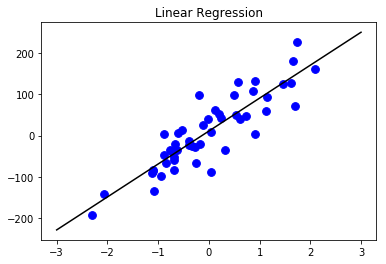

In [26]:
from sklearn.datasets import make_regression
#生成用于回归分析的数据集
X,y=make_regression(n_samples=50,n_features=1,n_informative=1,noise=50,random_state=1)
#使用线性模型对数据进行拟合
reg=LinearRegression()
reg.fit(X,y)
#z是我们生成的等差数列，用来画线性模型的图形
z=np.linspace(-3,3,200).reshape(-1,1)
plt.scatter(X,y,c='b',s=60)
plt.plot(z,reg.predict(z),c='k')
plt.title('Linear Regression')

In [27]:
print('直线的系数为：{:.2f}'.format(reg.coef_[0]))
print('直线的截距为：{:.2f}'.format(reg.intercept_))

直线的系数为：79.52
直线的截距为：10.92


线性回归

In [28]:
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X,y=make_regression(n_samples=100,n_features=2,n_informative=2,random_state=38)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)
lr=LinearRegression().fit(X_train,y_train)
print('lr.coef_:{}'.format(lr.coef_[:]))
print('lr.intercept_:{}'.format(lr.intercept_))

lr.coef_:[70.38592453  7.43213621]
lr.intercept_:-1.4210854715202004e-14


In [29]:
print('训练数据集得分：{:.2f}'.format(lr.score(X_train,y_train)))
print('测试数据集得分：{:.2f}'.format(lr.score(X_train,y_train)))
#由于没有添加noise,所以得分都是满分

训练数据集得分：1.00
测试数据集得分：1.00


In [30]:
from sklearn.datasets import load_diabetes
#载入糖尿病请数据集
X,y=load_diabetes().data,load_diabetes().target
#将数据集拆分成训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=8)
#使用线性回归模型进行拟合
lr=LinearRegression().fit(X_train,y_train)
print('训练集数据得分：{:.2f}'.format(lr.score(X_train,y_train)))
print('测试集数据得分：{:.2f}'.format(lr.score(X_test,y_test)))
# print('lr.coef_:{}'.format(lr.coef_[:]))
# print('lr.intercept_:{}'.format(lr.intercept_))

训练集数据得分：0.53
测试集数据得分：0.46


岭回归

In [31]:
#导入岭回归
from sklearn.linear_model import Ridge
#使用岭回归对数据进行拟合
rigde=Ridge().fit(X_train,y_train)
print('岭回归的训练数据集得分：{:.2f}'.format(rigde.score(X_train,y_train)))
print('岭回归的测试数据集得分：{:.2f}'.format(rigde.score(X_test,y_test)))

岭回归的训练数据集得分：0.43
岭回归的测试数据集得分：0.43


In [41]:
#修改alpha的参数为10
rigde10=Ridge(alpha=10).fit(X_train,y_train)
print('训练数据集的得分：{:.2f}'.format(rigde10.score(X_train,y_train)))
print('测试数据集的得分：{:.2f}'.format(rigde10.score(X_test,y_test)))
#测试集高于训练集，出现了过拟合现象，可以再提高alpha值来降低过拟合程度，alpha默认为1，修改为非常小的值，如0.01，结果就非常接近线性回归

训练数据集的得分：0.15
测试数据集的得分：0.16


In [58]:
#修改alpha的参数为0.1
ridge01=Ridge(alpha=0.1).fit(X_train,y_train)
print('训练数据集的得分：{:.2f}'.format(rigde10.score(X_train,y_train)))
print('测试数据集的得分：{:.2f}'.format(rigde10.score(X_test,y_test)))

训练数据集的得分：0.52
测试数据集的得分：0.47


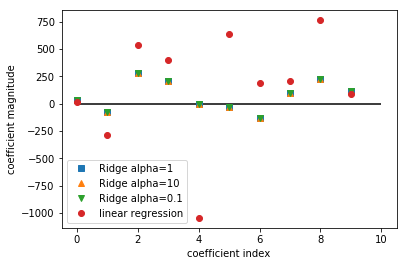

In [43]:
#绘制alpha=1时的模型系数
plt.plot(rigde.coef_,'s',label='Ridge alpha=1')
#绘制alpha=10时的模型系数
plt.plot(rigde.coef_,'^',label='Ridge alpha=10')
#绘制alpha=0.1时的模型系数
plt.plot(rigde.coef_,'v',label='Ridge alpha=0.1')
#绘制线性回归的系数作为对比
plt.plot(lr.coef_,'o',label='linear regression')
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.legend()

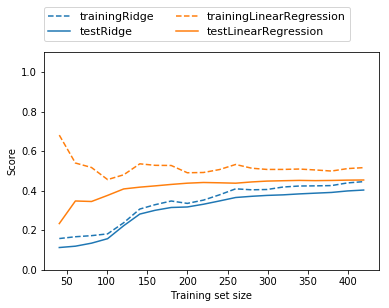

In [45]:
from sklearn.model_selection import learning_curve,KFold
#定义一个绘制学习曲线的函数
def plot_learning_curve(est,X,y):
    #将数据进行20次拆分用来对模型进行评分
    training_set_size,train_scores,test_scores=learning_curve(
    est,X,y,train_sizes=np.linspace(.1,1,20),cv=KFold(20,shuffle=True,random_state=1))
    estimator_name=est.__class__.__name__
    line=plt.plot(training_set_size,train_scores.mean(axis=1),'--',
             label='training'+estimator_name)
    plt.plot(training_set_size,test_scores.mean(axis=1),'-',
            label='test'+estimator_name,c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0,1.1)

plot_learning_curve(Ridge(alpha=1),X,y)
plot_learning_curve(LinearRegression(),X,y)
plt.legend(loc=(0,1.05),ncol=2,fontsize=11)

#套索回归

In [47]:
#导入套索回归
from sklearn.linear_model import Lasso
#使用套索回归拟合数据
lasso=Lasso().fit(X_train,y_train)
print('套索回归训练数据集的得分：{:.2f}'.format(lasso.score(X_train,y_train)))
print('套索回归测试数据集的得分：{:.2f}'.format(lasso.score(X_test,y_test)))
print('套索回归使用的特征数：{}'.format(np.sum(lasso.coef_!=0)))

套索回归训练数据集的得分：0.36
套索回归测试数据集的得分：0.37
套索回归使用的特征数：3


In [49]:
#增加最大迭代次数的默认设置
#否则模型会提示我们增加最大迭代次数
lasso01=Lasso(alpha=0.1,max_iter=100000).fit(X_train,y_train)
print('alpha=0.1时套索回归训练数据集的得分：{:.2f}'.format(lasso01.score(X_train,y_train)))
print('alpha=0.1时套索回归测试数据集的得分：{:.2f}'.format(lasso01.score(X_test,y_test)))
print('alpha=0.1时套索回归使用的特征数：{}'.format(np.sum(lasso01.coef_!=0)))
#如果把alpha改为等于0.0001，则又有点过拟合的现象了

alpha=0.1时套索回归训练数据集的得分：0.52
alpha=0.1时套索回归测试数据集的得分：0.48
alpha=0.1时套索回归使用的特征数：7


In [51]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print('alpha=0.0001时套索回归训练数据集的得分：{:.2f}'.format(lasso00001.score(X_train,y_train)))
print('alpha=0.0001时套索回归测试数据集的得分：{:.2f}'.format(lasso00001.score(X_test,y_test)))
print('alpha=0.0001时套索回归使用的特征数：{}'.format(np.sum(lasso00001.coef_!=0)))

alpha=0.0001时套索回归训练数据集的得分：0.53
alpha=0.0001时套索回归测试数据集的得分：0.46
alpha=0.0001时套索回归使用的特征数：10


Text(0, 0.5, 'Coefficient magnitude')

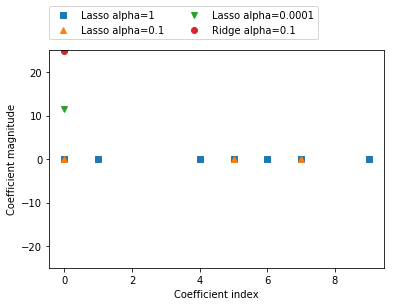

In [59]:
#绘制alpha=1时的模型系数
plt.plot(lasso.coef_,'s',label='Lasso alpha=1')
#绘制alpha=0.1时的模型系数
plt.plot(lasso01.coef_,'^',label='Lasso alpha=0.1')
#绘制alpha=0.0001时的模型系数
plt.plot(lasso00001.coef_,'v',label='Lasso alpha=0.0001')
#绘制alpha=0.1时的岭回归模型系数作为对比
plt.plot(ridge01.coef_,'o',label='Ridge alpha=0.1')
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')